In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import os
import cv2
import pickle
import matplotlib.pyplot as plt
import random
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten, Conv2D, MaxPooling2D,BatchNormalization


In [4]:
#renaming real and fake directories
real = "../input/real-and-fake-face-detection/real_and_fake_face/training_real/"
fake = "../input/real-and-fake-face-detection/real_and_fake_face/training_fake/"
#we're creating a list of real and fake images
real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [5]:
print(len(real_path))
print(len(fake_path))

1081
960


In [6]:
#creating training data with label for both genuine and fake images together
#we want to one hot encode our label such that it is in the following format
# [1] = genuine; 
# [0] = fake


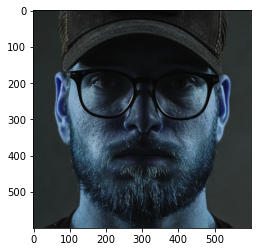

In [7]:

plt.imshow(cv2.imread(os.path.join(real, real_path[0])))

In [36]:
   
img_size = int(128)
def create_training_data():
    training_data = []
    y=[]
    for img in tqdm(real_path[:981]):
        path = os.path.join(real, img)
#         label = [1] 
        image = cv2.resize( cv2.imread(path), (img_size,img_size) )
        training_data.append(np.array(image))
        y.append(1)
        
    for img in tqdm(fake_path[:860]):
        path = os.path.join(fake, img)
#         label = [0] 
        image = cv2.resize(cv2.imread(path), (img_size,img_size))
        training_data.append(np.array(image))  
        y.append(0)
        
    return(training_data,y)

def create_test_data():
    test_data = []
    output_data=[]
    for img in tqdm(real_path[981:]):
        path = os.path.join(real, img)
        image = cv2.resize( cv2.imread(path), (img_size,img_size) )
        
        test_data.append(np.array(image))
        output_data.append(1)
        
    for img in tqdm(fake_path[860:]):
        path = os.path.join(fake, img)
        image = cv2.resize(cv2.imread(path), (img_size,img_size))
        
        test_data.append(np.array(image))
        output_data.append(0)

    return(test_data,output_data)

    

X_train,Y_train = create_training_data()
X_test,Y_test= create_test_data()




100%|██████████| 100/100 [00:01<00:00, 97.33it/s]


In [37]:
l=list(zip(X_train,Y_train))
shuffle(l)
X_train,Y_train=zip(*l)

In [38]:

# print(X[0].reshape(-1, 50, 50, 1))
X_train = np.array(X_train)

#divide by 255 to squish values to 0 - 1 normalization
X_train = X_train/255.0
Y_train=np.array(Y_train)


X_test = np.array(X_test)

#divide by 255 to squish values to 0 - 1 normalization
X_test = X_test/255.0
Y_test=np.array(Y_test)


In [39]:
print(X_train.shape[1:])
print(X_train.shape[:])
#checking shape of array to confirm
# print(len(y))

(128, 128, 3)
(1841, 128, 128, 3)


In [40]:
X_train[1]

array([[[0.72156863, 0.73333333, 0.85490196],
        [0.70588235, 0.73333333, 0.84705882],
        [0.69803922, 0.74117647, 0.84705882],
        ...,
        [0.17647059, 0.17254902, 0.33333333],
        [0.2       , 0.19607843, 0.34901961],
        [0.20784314, 0.21176471, 0.34509804]],

       [[0.74901961, 0.74117647, 0.86666667],
        [0.72156863, 0.72941176, 0.84705882],
        [0.68235294, 0.71372549, 0.83529412],
        ...,
        [0.1372549 , 0.14509804, 0.28235294],
        [0.16078431, 0.16078431, 0.31764706],
        [0.17254902, 0.16862745, 0.32156863]],

       [[0.77647059, 0.74901961, 0.88627451],
        [0.74901961, 0.73333333, 0.87058824],
        [0.69803922, 0.70196078, 0.83529412],
        ...,
        [0.09019608, 0.11372549, 0.24705882],
        [0.11372549, 0.11372549, 0.27058824],
        [0.12941176, 0.12941176, 0.28627451]],

       ...,

       [[0.74509804, 0.80784314, 0.89803922],
        [0.74117647, 0.80784314, 0.89019608],
        [0.72941176, 0

In [41]:
df=pd.DataFrame(Y_train)
df[0].value_counts()

1    981
0    860
Name: 0, dtype: int64

(128, 128, 3)

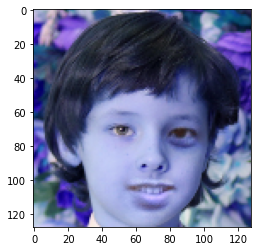

In [42]:
plt.imshow(X_train[1])
X_train[1].shape


In [43]:
#let us make the model

model = Sequential()

model.add(Conv2D(64,(3,3), input_shape=X_train.shape[1:])) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu")) 

model.add(Conv2D(32,(3,3)))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))

model.add(Conv2D(16,(3,3))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))



model.add(Flatten()) 

model.add(Dense(128,kernel_regularizer="l2"))
model.add(Activation("relu",))
model.add(Dropout(0.12))


model.add(Dense(1)) 
model.add(Activation("sigmoid"))


opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = ['accuracy'])




Epoch 1/15
23/23 [==============================] - 1s 33ms/step - loss: 1.9888 - accuracy: 0.5387 - val_loss: 1.1532 - val_accuracy: 0.5637
Epoch 2/15
23/23 [==============================] - 1s 24ms/step - loss: 0.9021 - accuracy: 0.5537 - val_loss: 0.7551 - val_accuracy: 0.5854
Epoch 3/15
23/23 [==============================] - 1s 24ms/step - loss: 0.7247 - accuracy: 0.5883 - val_loss: 0.7042 - val_accuracy: 0.5908
Epoch 4/15
23/23 [==============================] - 1s 24ms/step - loss: 0.6900 - accuracy: 0.6121 - val_loss: 0.6846 - val_accuracy: 0.6016
Epoch 5/15
23/23 [==============================] - 1s 24ms/step - loss: 0.6653 - accuracy: 0.6379 - val_loss: 0.6860 - val_accuracy: 0.6043
Epoch 6/15
23/23 [==============================] - 1s 25ms/step - loss: 0.6587 - accuracy: 0.6454 - val_loss: 0.7156 - val_accuracy: 0.5718
Epoch 7/15
23/23 [==============================] - 1s 26ms/step - loss: 0.6678 - accuracy: 0.6189 - val_loss: 0.6978 - val_accuracy: 0.5854
Epoch 8/15
23

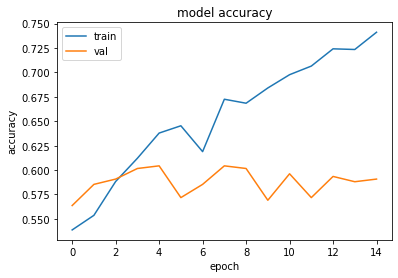

In [44]:
history=model.fit(X_train,Y_train, batch_size = 64, epochs = 15, validation_split = 0.2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
model.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.7610 - accuracy: 0.6250


[0.7609743475914001, 0.625]

In [46]:
model.save('my_finalised_cnn', save_format='tf')

In [47]:
trained_model = keras.models.load_model('my_finalised_cnn') 
print (trained_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
activation_8 (Activation)    (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 16)       

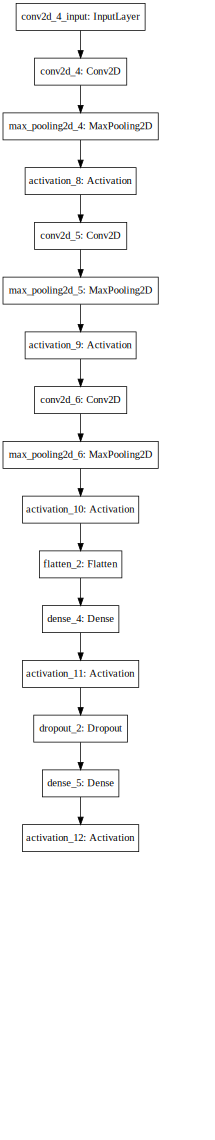

In [48]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(model).create(prog="dot",format="svg"))